# Importing Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Association
from apyori import apriori

data link: https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv

In [72]:
data = pd.read_csv(r'https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')

In [73]:
df = data.copy()

# Data Analysis🚀

In [74]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [76]:
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [77]:
data.shape

(38765, 3)

In [78]:
data.size

116295

In [79]:
data.ndim

2

In [80]:
data.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [81]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Q1. Which of the items are the top 10 selling item?

In [82]:
data['itemDescription'].value_counts().head(10).sort_values(ascending=False)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 selling items')

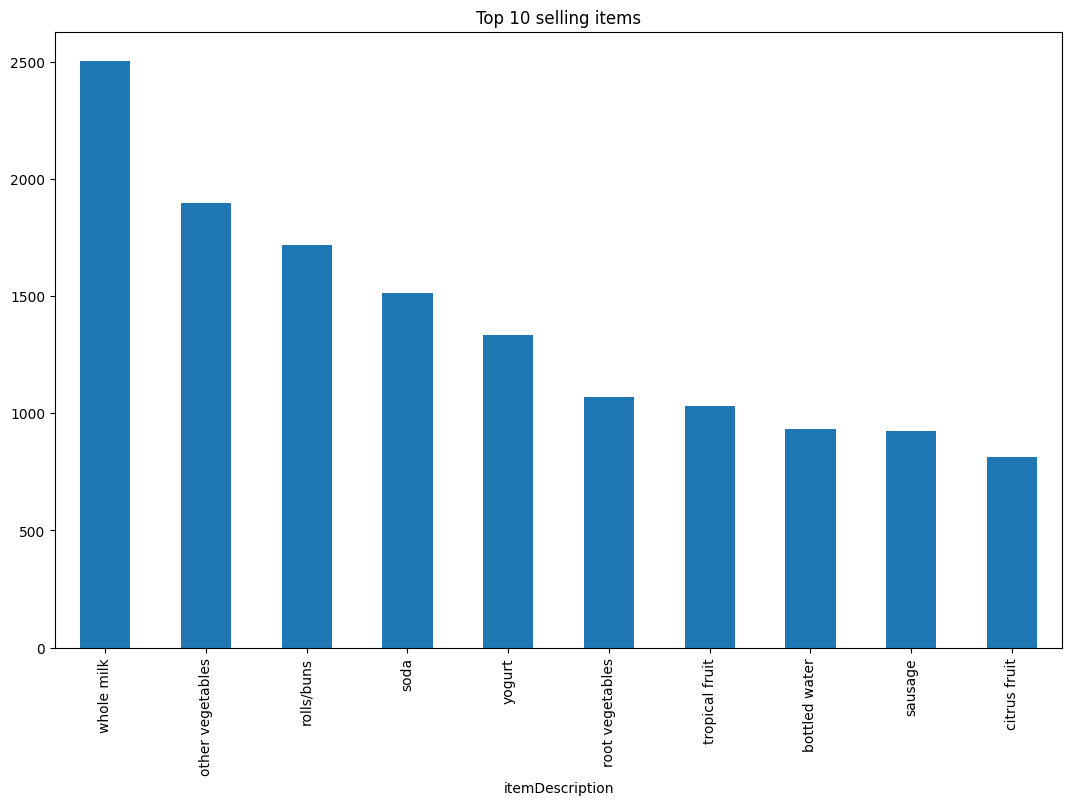

In [83]:
plt.figure(figsize=(13,8))
data['itemDescription'].value_counts().head(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 selling items')

Q2. Which of the item is the least 10 selling item?

In [84]:
data['itemDescription'].value_counts().tail(10).sort_values()

itemDescription
kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: count, dtype: int64

<Axes: xlabel='itemDescription'>

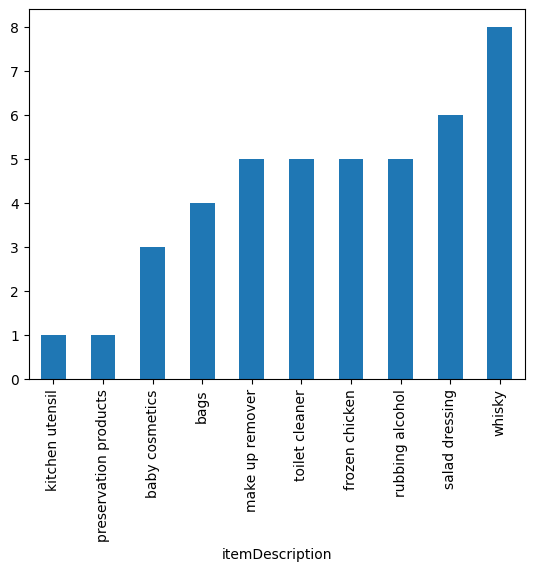

In [85]:
data['itemDescription'].value_counts().tail(10).sort_values().plot(kind='bar')

Q3. Top 10 customers

In [86]:
data['Member_number'].value_counts().head(10).sort_values(ascending=False)

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: count, dtype: int64

<Axes: xlabel='Member_number'>

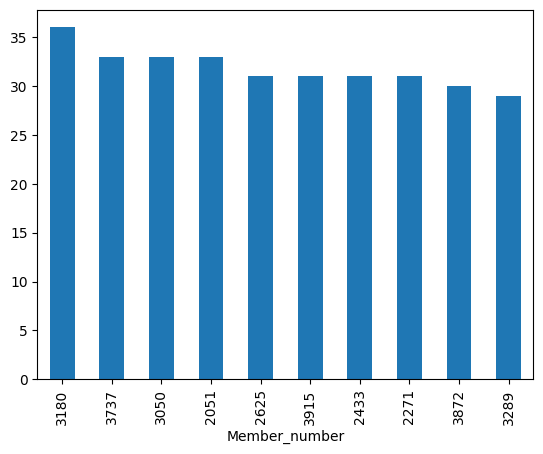

In [87]:
data['Member_number'].value_counts().head(10).sort_values(ascending=False).plot(kind='bar')

In [88]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Seprating the Date column into 3 columns day, month , year

In [89]:
cdata = data.copy()

In [90]:
cdata.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [91]:
cdata['day'] = pd.DatetimeIndex(data['Date']).day
cdata['month'] = pd.DatetimeIndex(data['Date']).month
cdata['year'] = pd.DatetimeIndex(data['Date']).year

In [92]:
cdata.head()

,Member_number,Date,itemDescription,day,month,year
0,1808,21-07-2015,tropical fruit,21,7,2015
1,2552,05-01-2015,whole milk,1,5,2015
2,2300,19-09-2015,pip fruit,19,9,2015
3,1187,12-12-2015,other vegetables,12,12,2015
4,3037,01-02-2015,whole milk,2,1,2015


In [93]:
# cdata.drop(columns={'Date'},inplace=True)

Most of the transitation

In [94]:
cdata['year'].value_counts()

year
2015    20488
2014    18277
Name: count, dtype: int64

In [95]:
cdata['month'].value_counts()

month
8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: count, dtype: int64

In [96]:
cdata[cdata['year'] == 2015]['month'].value_counts()

month
8     1963
1     1829
3     1792
6     1791
11    1777
5     1710
4     1666
10    1663
7     1645
9     1613
12    1554
2     1485
Name: count, dtype: int64

In [97]:
cdata[cdata['year']==2015][['day','month','year']].value_counts().head(10)

day  month  year
21   1      2015    96
     7      2015    93
29   11     2015    92
8    8      2015    92
30   4      2015    91
26   3      2015    88
30   9      2015    87
19   6      2015    85
16   5      2015    85
4    1      2015    83
Name: count, dtype: int64

In [98]:
cdata[((cdata['year'] == 2015) & (cdata['month'] == 10))]['day'].value_counts().head(10)

day
7     80
5     72
14    72
27    71
11    68
10    67
2     67
25    66
26    63
4     62
Name: count, dtype: int64

In [99]:
cdata[((cdata['year']==2015) & (cdata['month']==10) & (cdata['day']==7))]['day'].value_counts()

day
7    80
Name: count, dtype: int64

# Aprori Implementation

In [100]:
cdata.head()

,Member_number,Date,itemDescription,day,month,year
0,1808,21-07-2015,tropical fruit,21,7,2015
1,2552,05-01-2015,whole milk,1,5,2015
2,2300,19-09-2015,pip fruit,19,9,2015
3,1187,12-12-2015,other vegetables,12,12,2015
4,3037,01-02-2015,whole milk,2,1,2015


In [101]:
data = cdata.copy()
data1 = data.copy()

In [102]:
data = pd.get_dummies(data['itemDescription'])

In [103]:
data.head(2)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [104]:
data1.head()

,Member_number,Date,itemDescription,day,month,year
0,1808,21-07-2015,tropical fruit,21,7,2015
1,2552,05-01-2015,whole milk,1,5,2015
2,2300,19-09-2015,pip fruit,19,9,2015
3,1187,12-12-2015,other vegetables,12,12,2015
4,3037,01-02-2015,whole milk,2,1,2015


In [105]:
data1.drop(columns={'itemDescription'},inplace=True)

In [106]:
data1.head()

,Member_number,Date,day,month,year
0,1808,21-07-2015,21,7,2015
1,2552,05-01-2015,1,5,2015
2,2300,19-09-2015,19,9,2015
3,1187,12-12-2015,12,12,2015
4,3037,01-02-2015,2,1,2015


In [107]:
data1 = data1.join(data)

In [108]:
data1.head()

,Member_number,Date,day,month,year,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,21,7,2015,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,05-01-2015,1,5,2015,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,19-09-2015,19,9,2015,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,12-12-2015,12,12,2015,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,01-02-2015,2,1,2015,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [109]:
products = cdata['itemDescription'].unique()

In [110]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [111]:
data2 = data1.groupby(['Member_number','Date'])[products[:]].sum()

In [112]:
data2.head(5)

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [113]:
data2 = data2.reset_index()[products]

In [114]:
data2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
def func(data):
    for i in products:
        if data[i]>0:
            data[i] = i
    return data

In [116]:
data2 = data2.apply(func,axis=1)

In [117]:
data2.head(3)

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
data2.values

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [119]:
newdata = data2.values

In [123]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [131]:
newdata = [i[i!=0].tolist() for i in newdata]

In [132]:
newdata[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [133]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# Aproiori Implementation

In [134]:
df['itemDescription']

0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object

In [135]:
newdata

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['other vegetables', 'frozen vegetables'],
 ['whole milk', 'butter'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['rolls/buns', 'sausage'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['whole milk', 'root vegetables', 'pastry'],
 

In [149]:
association = apriori(transactions=newdata,
                     min_support=0.0005,
                      min_confidence=0.05,
                      min_lift=2,
                      max_length=3)

result = list(association)

In [150]:
result[0]

RelationRecord(items=frozenset({'whole milk', 'brandy'}), support=0.0008688097306689834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brandy'}), items_add=frozenset({'whole milk'}), confidence=0.34210526315789475, lift=2.1662805978127717)])

In [151]:
for i in result[5]:
    print(i)

frozenset({'soda', 'spices'})
0.0006014836596939117
[OrderedStatistic(items_base=frozenset({'spices'}), items_add=frozenset({'soda'}), confidence=0.225, lift=2.317050929112182)]


In [152]:
result[0][0]

frozenset({'brandy', 'whole milk'})